<img src='imgs/keras.png' />

# Neural Networks

### load, sample, split data

In [1]:
%%time
# 

import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_all.csv')

y = df['isFraud']
X = df.drop(columns = ['isFraud'], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

del df, X, y, train_test_split

### simple Keras NN

In [2]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

Using TensorFlow backend.


In [8]:
classifier = Sequential()

classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))

classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))

classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [11]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 15)                6030      
_________________________________________________________________
dense_11 (Dense)             (None, 15)                240       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 16        
Total params: 6,286
Trainable params: 6,286
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 1)

Epoch 1/1
442905/442905 [==============================] - 49s 111us/step - loss: 15.3804 - acc: 0.0352


In [15]:
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 1)

Epoch 1/1
442905/442905 [==============================] - 48s 109us/step - loss: 15.3804 - acc: 0.0352


In [ ]:
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 1)

In [ ]:
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 1)

In [ ]:
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 1)

# results

In [39]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [29]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
score = classifier.evaluate(X_test, y_test)
score

147635/147635 [==============================] - 4s 27us/step


[15.396950938081742, 0.03421275442820097]

Test Data Accuracy: 0.0342


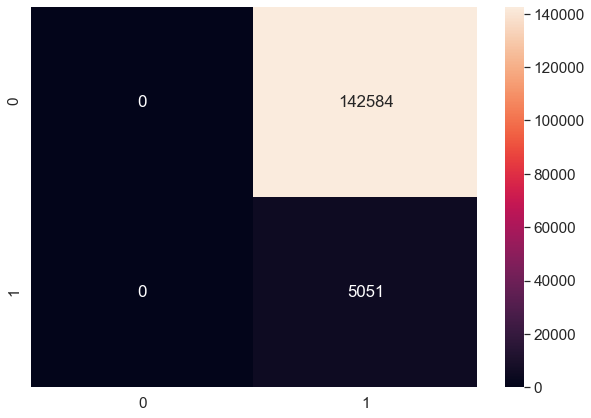

In [41]:
## EXTRA: Confusion Matrix
cm = metrics.confusion_matrix(y_test, y_pred) # rows = truth, cols = prediction
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g')
print("Test Data Accuracy: %0.4f" % metrics.accuracy_score(y_test, y_pred))

In [49]:
from sklearn import metrics
import numpy as np

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
metrics.auc(fpr, tpr)

0.5

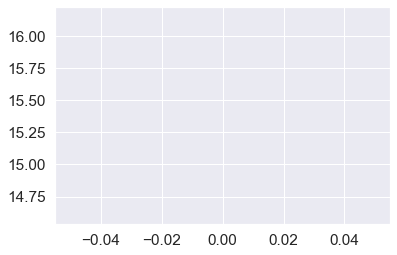

In [43]:
pyplot.plot(history.history['loss'], label='train')
pyplot.show()

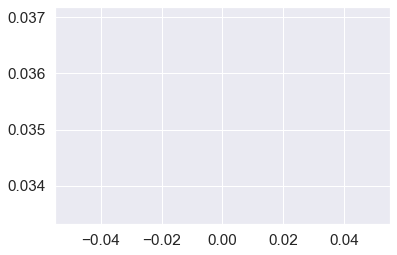

In [44]:
pyplot.plot(history.history['acc'], label='test')
pyplot.show()